<a href="https://colab.research.google.com/github/nika-va/practice/blob/main/05_transfer_learning_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!nvidia-smi

Tue Oct  3 17:22:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    29W /  70W |   2923MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [117]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-10-03 17:22:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-10-03 17:22:44 (9.47 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [118]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [119]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-10-03 17:22:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.4’

10_food_classes_10_ 100%[===================>] 160.74M  30.4MB/s    in 6.3s    

2023-10-03 17:22:50 (25.6 MB/s) - ‘10_food_classes_10_percent.zip.4’ saved [168546183/168546183]



In [120]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [121]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [122]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [123]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [124]:
# for images, labels in train_data_10_percent.take(1):
#   print(images, labels)

In [125]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_data_10_percent, epochs=10, steps_per_epoch=(len(train_data_10_percent)))

Epoch 1/10
24/24 [==============================] - 20s 90ms/step - loss: 1.8190 - accuracy: 0.4547
Epoch 2/10
24/24 [==============================] - 2s 59ms/step - loss: 1.0539 - accuracy: 0.7880
Epoch 3/10
24/24 [==============================] - 2s 58ms/step - loss: 0.7577 - accuracy: 0.8493
Epoch 4/10
24/24 [==============================] - 3s 84ms/step - loss: 0.6124 - accuracy: 0.8693
Epoch 5/10
24/24 [==============================] - 2s 59ms/step - loss: 0.5220 - accuracy: 0.8920
Epoch 6/10
24/24 [==============================] - 2s 58ms/step - loss: 0.4554 - accuracy: 0.9027
Epoch 7/10
24/24 [==============================] - 2s 57ms/step - loss: 0.4034 - accuracy: 0.9187
Epoch 8/10
24/24 [==============================] - 2s 78ms/step - loss: 0.3644 - accuracy: 0.9240
Epoch 9/10
24/24 [==============================] - 2s 60ms/step - loss: 0.3285 - accuracy: 0.9333
Epoch 10/10
24/24 [==============================] - 2s 61ms/step - loss: 0.3005 - accuracy: 0.9480


In [126]:
len(train_data_10_percent)

24

In [127]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
print(f"shape after passing inputs through base modl: {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"shape after GlobalAveragePooling2D: {x.shape}")
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics='accuracy')
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning",
                                                               "10_percent_feature_extraction")])

shape after passing inputs through base modl: (None, 7, 7, 1280)
shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231003-172346
Epoch 1/5
24/24 [==============================] - 14s 210ms/step - loss: 1.8425 - accuracy: 0.4120 - val_loss: 1.2918 - val_accuracy: 0.7368
Epoch 2/5
24/24 [==============================] - 5s 181ms/step - loss: 1.0838 - accuracy: 0.7720 - val_loss: 0.8916 - val_accuracy: 0.7977
Epoch 3/5
24/24 [==============================] - 5s 179ms/step - loss: 0.7808 - accuracy: 0.8347 - val_loss: 0.7305 - val_accuracy: 0.8355
Epoch 4/5
24/24 [==============================] - 4s 147ms/step - loss: 0.6265 - accuracy: 0.8627 - val_loss: 0.6391 - val_accuracy: 0.8405
Epoch 5/5
24/24 [==============================] - 5s 178ms/step - loss: 0.5353 - accuracy: 0.8947 - val_loss: 0.5772 - val_accuracy: 0.8503


In [128]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.5523 - accuracy: 0.8628


[0.5523466467857361, 0.8628000020980835]

In [129]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_13
1 rescaling_15
2 normalization_9
3 rescaling_16
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activ

In [130]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_15 (Rescaling)    (None, None, None, 3)        0         ['input_13[0][0]']            
                                                                                                  
 normalization_9 (Normaliza  (None, None, None, 3)        7         ['rescaling_15[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_16 (Rescaling)    (None, None, None, 3)        0         ['normalization_9

In [131]:
model_0.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

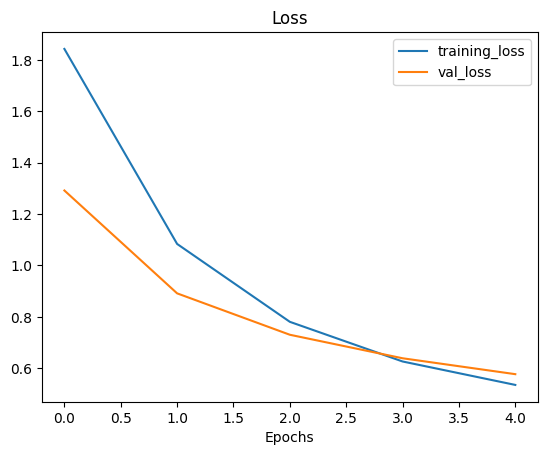

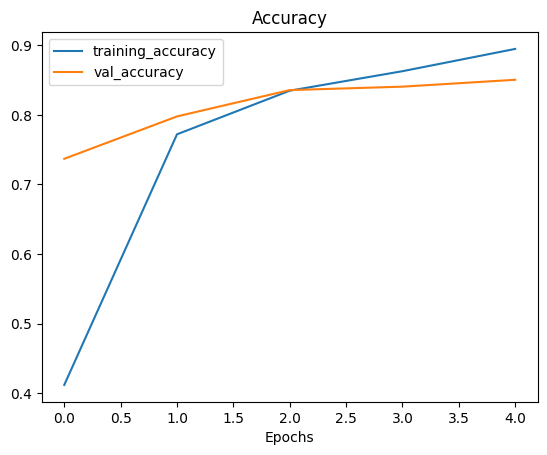

In [132]:
plot_loss_curves(history_0)

In [133]:
from keras.src.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
input_shape = (1, 4, 4 ,3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'random input tensor:\n {input_tensor}\n')

tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]



<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [134]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [135]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2023-10-03 17:24:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.23.207, 74.125.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M  28.7MB/s    in 5.4s    

2023-10-03 17:24:38 (23.6 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [136]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir_1_percent = '10_food_classes_1_percent/test'

In [137]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There a

In [138]:
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [139]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1/255.)
], name ='data_augmentation')


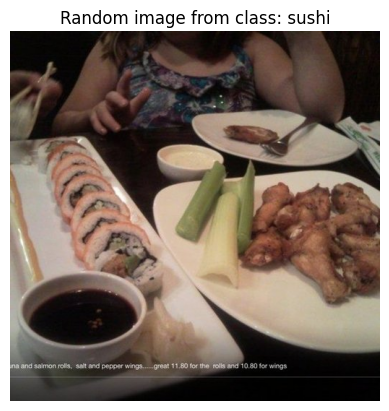

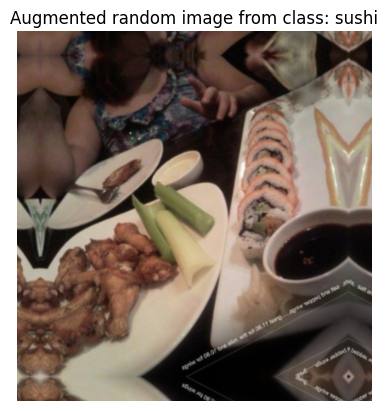

In [140]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +'/'+ random_image

img = mpimg.imread(random_image_path)
plt.title(f"Random image from class: {target_class}")
plt.imshow(img)
plt.axis('off');

augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis('off');

In [141]:
os.listdir(target_dir)

['765514.jpg',
 '1122280.jpg',
 '2932846.jpg',
 '390178.jpg',
 '300722.jpg',
 '723084.jpg',
 '568994.jpg']

## Model_1

In [142]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        validation_data=test_data_1_percent,
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               '1_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20231003-172444
Epoch 1/5
3/3 [==============================] - 17s 4s/step - loss: 2.3943 - accuracy: 0.1286 - val_loss: 2.2939 - val_accuracy: 0.1548
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1252 - accuracy: 0.2286 - val_loss: 2.1522 - val_accuracy: 0.2612
Epoch 3/5
3/3 [==============================] - 11s 5s/step - loss: 1.9175 - accuracy: 0.4143 - val_loss: 2.0247 - val_accuracy: 0.3528
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7401 - accuracy: 0.6000 - val_loss: 1.9087 - val_accuracy: 0.4308
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.5737 - accuracy: 0.6857 - val_loss: 1.8064 - val_accuracy: 0.4972


In [143]:
model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                          

In [144]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 7s 83ms/step - loss: 1.8064 - accuracy: 0.4972


[1.8063832521438599, 0.49720001220703125]

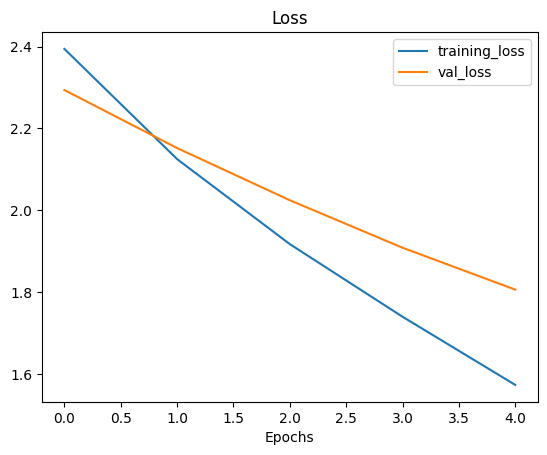

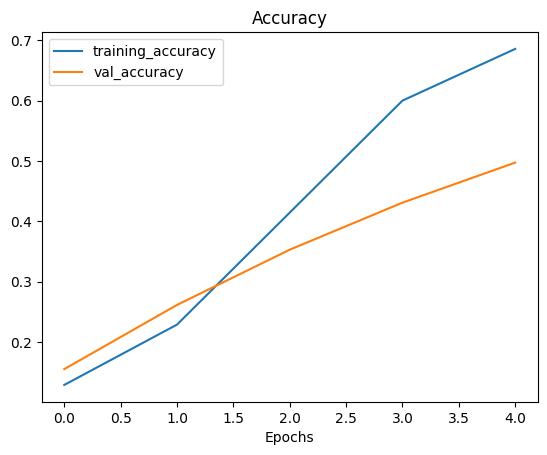

In [145]:
plot_loss_curves(history_1)

## Model_2

In [146]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-10-03 17:25:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.5’

10_food_classes_10_ 100%[===================>] 160.74M  26.4MB/s    in 7.0s    

2023-10-03 17:25:56 (22.8 MB/s) - ‘10_food_classes_10_percent.zip.5’ saved [168546183/168546183]



In [147]:
train_dir_10_percent = '10_food_classes_10_percent/train/'
test_dir_10_percent = '10_food_classes_10_percent/test/'

In [148]:
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                          label_mode='categorical',
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [149]:
# Layer preparation
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1/255.)
], name ='data_augmentation')

# Creating model_2
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)
outputs = keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_2 = keras.Model(inputs, outputs)
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
history_2 = model_2.fit(train_data_10_percent,
                        epochs=5,
                        validation_data=test_data_10_percent,
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               '10_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231003-172601
Epoch 1/5
24/24 [==============================] - 26s 780ms/step - loss: 1.9812 - accuracy: 0.3587 - val_loss: 1.4382 - val_accuracy: 0.6660
Epoch 2/5
24/24 [==============================] - 11s 454ms/step - loss: 1.2759 - accuracy: 0.7160 - val_loss: 0.9857 - val_accuracy: 0.7892
Epoch 3/5
24/24 [==============================] - 12s 475ms/step - loss: 0.9951 - accuracy: 0.7427 - val_loss: 0.7931 - val_accuracy: 0.8268
Epoch 4/5
24/24 [==============================] - 11s 471ms/step - loss: 0.8296 - accuracy: 0.8120 - val_loss: 0.6934 - val_accuracy: 0.8364
Epoch 5/5
24/24 [==============================] - 11s 448ms/step - loss: 0.7332 - accuracy: 0.8107 - val_loss: 0.6299 - val_accuracy: 0.8436


In [150]:
model_2.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                          

In [182]:
checkpoint_path = 'ten_percent_model_checkpoints_weights/checkpoint'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq='epoch',
                                                         verbose=1)


In [183]:
model_2.fit(train_data_10_percent,
            epochs=5,
            validation_data=test_data_10_percent,
            callbacks=[create_tensorboard_callback('transfer_learning',
                                                   '10_percent_data_aug'),
                       checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231003-174003
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9760
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint
24/24 [==============================] - 12s 457ms/step - loss: 0.0627 - accuracy: 0.9760 - val_loss: 0.5193 - val_accuracy: 0.8580
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9827
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint
24/24 [==============================] - 12s 477ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.4965 - val_accuracy: 0.8696
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9827
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint
24/24 [==============================] - 13s 533ms/step - loss: 0.0688 - accuracy: 0.9827 - val_loss: 0.4804 - val_accuracy: 0.8588
Epoch 4/5
24/24 

In [153]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 0.5523 - accuracy: 0.8628


[0.5523464679718018, 0.8628000020980835]

In [154]:
a = model_2.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.4989 - accuracy: 0.8580


In [185]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 70ms/step - loss: 0.5802 - accuracy: 0.8480


[0.58022141456604, 0.8479999899864197]

In [157]:
import numpy as np
np.isclose(np.array(a), np.array(b))

array([ True,  True])

In [158]:
model_2.load_weights(checkpoint_path)

## Model_3

In [159]:
model_2.layers

In [160]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x78832d00f970> True
<keras.src.engine.sequential.Sequential object at 0x78828c99cc70> True
<keras.src.engine.functional.Functional object at 0x78829e42ef50> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x78828c99c910> True
<keras.src.layers.core.dense.Dense object at 0x78828c99f9a0> True


In [161]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_15 False
1 rescaling_19 False
2 normalization_11 False
3 rescaling_20 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [186]:
# Fine-tuning
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')


In [163]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_15 False
1 rescaling_19 False
2 normalization_11 False
3 rescaling_20 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [164]:
print(len(model_2.trainable_variables))

12


In [165]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

In [187]:
fine_tune_epochs = 5 + 5

history_3 = model_2.fit(train_data_10_percent,
                        epochs=fine_tune_epochs,
                        validation_data=test_data_10_percent,
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               '10_percent_fine_tune_last_10')])


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231003-174221
Epoch 5/10
24/24 [==============================] - 24s 594ms/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 0.4789 - val_accuracy: 0.8688
Epoch 6/10
24/24 [==============================] - 11s 456ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 0.4689 - val_accuracy: 0.8700
Epoch 7/10
24/24 [==============================] - 15s 607ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 0.4662 - val_accuracy: 0.8728
Epoch 8/10
24/24 [==============================] - 11s 452ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.4741 - val_accuracy: 0.8724
Epoch 9/10
24/24 [==============================] - 11s 448ms/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.4844 - val_accuracy: 0.8692
Epoch 10/10
24/24 [==============================] - 15s 603ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.4890 - val_accuracy: 0.8736


In [188]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 68ms/step - loss: 0.4890 - accuracy: 0.8736


[0.48901116847991943, 0.8736000061035156]

## Model_4

In [168]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2023-10-03 17:31:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 108.177.125.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  19.0MB/s    in 29s     

2023-10-03 17:31:35 (17.0 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [169]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [170]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [171]:
import tensorflow as tf
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode='categorical',
                                                                                 batch_size=BATCH_SIZE,
                                                                                 image_size=IMG_SIZE)
test_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                                 label_mode='categorical',
                                                                                 batch_size=BATCH_SIZE,
                                                                                 image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [201]:
model_2.load_weights(checkpoint_path)

In [202]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 70ms/step - loss: 0.5802 - accuracy: 0.8480


[0.58022141456604, 0.8479999899864197]

In [203]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_15 False
1 rescaling_19 False
2 normalization_11 False
3 rescaling_20 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [205]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')

In [206]:
history_4 = model_2.fit(train_data_10_classes_full,
                        epochs=10,
                        validation_data=test_data_10_classes_full,
                        initial_epoch=history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback('transfer_learning',
                                                               'full_10_classes_fine_tune_last_10')])


Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20231003-184057
Epoch 5/10
235/235 [==============================] - 66s 225ms/step - loss: 0.6062 - accuracy: 0.8243 - val_loss: 0.3069 - val_accuracy: 0.9016
Epoch 6/10
235/235 [==============================] - 49s 208ms/step - loss: 0.4649 - accuracy: 0.8525 - val_loss: 0.2800 - val_accuracy: 0.9100
Epoch 7/10
235/235 [==============================] - 43s 181ms/step - loss: 0.4102 - accuracy: 0.8677 - val_loss: 0.2633 - val_accuracy: 0.9148
Epoch 8/10
235/235 [==============================] - 44s 187ms/step - loss: 0.3703 - accuracy: 0.8824 - val_loss: 0.2626 - val_accuracy: 0.9172
Epoch 9/10
235/235 [==============================] - 41s 172ms/step - loss: 0.3271 - accuracy: 0.8977 - val_loss: 0.2535 - val_accuracy: 0.9184
Epoch 10/10
235/235 [==============================] - 42s 177ms/step - loss: 0.3074 - accuracy: 0.8989 - val_loss: 0.2534 - val_accuracy: 0.9224


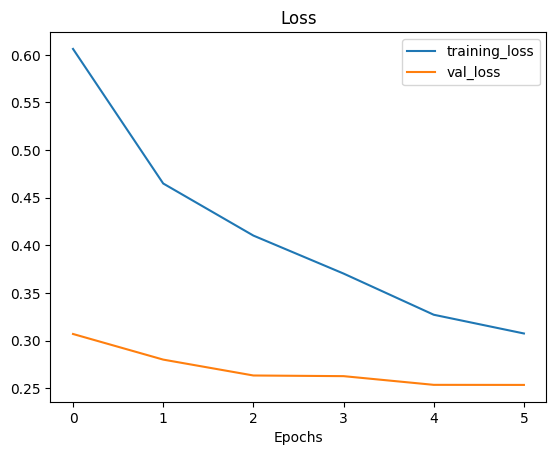

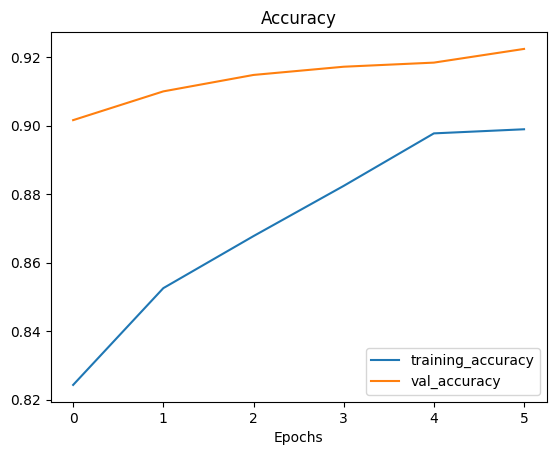

In [207]:
plot_loss_curves(history_4)